Used in both softmax regression (generalized logistic regression) and in neural networks when solving multiclass classification problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

See the Softmax Regression markdown file for details, but in short:

$$
	{\bf \vec a} = \frac {1}{\sum_{k = 1}^{N} {e^{z_k}}}
		\left[
		\begin{array}{c}
			e^{z_1} \\
			\vdots \\
			e^{z_N}			
		\end{array}
		\right]
$$

Otherwise, here's the numpy implementation:

In [2]:
def softmax(z):
    ez = np.exp(z)
    return ez / np.sum(ez)

Check it out with sliding z-values:

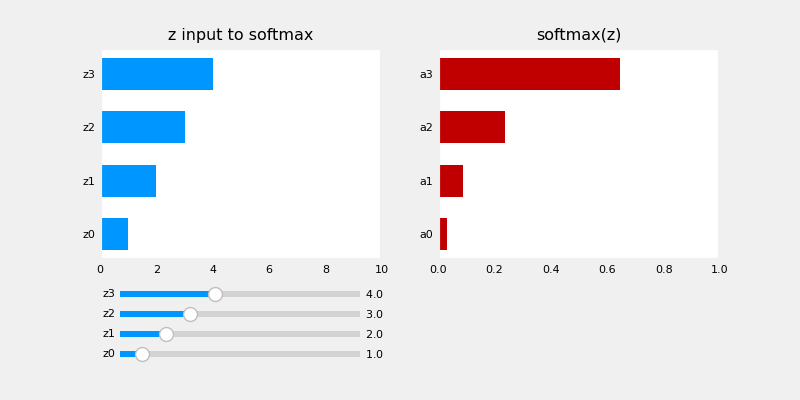

In [3]:
plt.close("all")
plt_softmax(softmax)

To note:
- Small differences are magnified greatly (exponent in numerator)
- Output always sums to 1, as we know
- All outputs are affected by all z-values. This is in contrast to ReLU and sigmoid.


The cost function is also different, though possible simpler, using:

$$\large
\displaylines{
loss(a_1, ..., a_n, y) = 
\begin{cases}
- log\ a_1 & \text{if } y = 1 \\
- log\ a_2 & \text{if } y = 2 \\
& \vdots \\
-log\ a_N & \text{if } y = N
\end{cases}
}
$$

$$
\large
\displaylines{
\begin{align}
	J({\bf \vec w}, b) = -\frac 1 m 
	\left[ 
	\sum_{i=1}^m 
	\sum_{j=1}^N
	[y^{(i)} == j] \ 
	log \ \frac {e^{z_j^{(i)}}} {\sum_{k=1}^N e^{z_k^{(i)}}}
	\right]
\end{align}
}
$$

In [4]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

The basic, but prone to rounding error method of a NN with softmax:

In [5]:
model = Sequential([
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(1e-3)
)

model.fit(
    X_train,
    y_train,
    epochs=10
)

2022-07-13 02:36:35.931550: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-13 02:36:35.932399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 02:36:35.934657: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-13 02:36:35.988592: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-13 02:36:36.010465: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3693405000 Hz


Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 1.2385
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5546
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2073
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1185
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0823
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 7/10
63/63 [==============================] - 0s 861us/step - loss: 0.0594
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0486
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 10/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0402


In [7]:
# A vector of probabilities
p = model.predict(X_train)
print(p[:2])
print(f"Max: {np.max(p)}\t\tMin: {np.min(p)}")

[[6.21e-03 9.21e-04 9.68e-01 2.46e-02]
 [9.97e-01 2.46e-03 7.18e-05 1.95e-05]]
Max: 0.9999994039535522		Min: 8.073141599673761e-10


The ideal method that minimizes rounding errors:

In [8]:
model = Sequential([
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(4, activation='linear')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-3)
)

model.fit(
    X_train,
    y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 1.0725
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5085
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2732
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1488
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 6/10
63/63 [==============================] - 0s 803us/step - loss: 0.0602
Epoch 7/10
63/63 [==============================] - 0s 969us/step - loss: 0.0542
Epoch 8/10
63/63 [==============================] - 0s 983us/step - loss: 0.0426
Epoch 9/10
63/63 [==============================] - 0s 960us/step - loss: 0.0368
Epoch 10/10
63/63 [==============================] - 0s 909us/step - loss: 0.0412


In [10]:
# NOT an array of probabilities, must be softmaxed after the fact.
p = model.predict(X_train)
print(p[:2])
print(f"Max: {np.max(p)}\t\tMin: {np.min(p)}")

sm = tf.nn.softmax(p).numpy()
print(sm[:2])
print(f"Max: {np.max(sm)}\t\tMin: {np.min(sm)}")

[[-2.98 -3.71  2.52 -1.66]
 [ 5.28 -0.69 -4.28 -7.  ]]
Max: 9.759657859802246		Min: -12.662416458129883
[[4.01e-03 1.92e-03 9.79e-01 1.49e-02]
 [9.97e-01 2.54e-03 7.02e-05 4.61e-06]]
Max: 0.9999996423721313		Min: 1.888957879003783e-09
